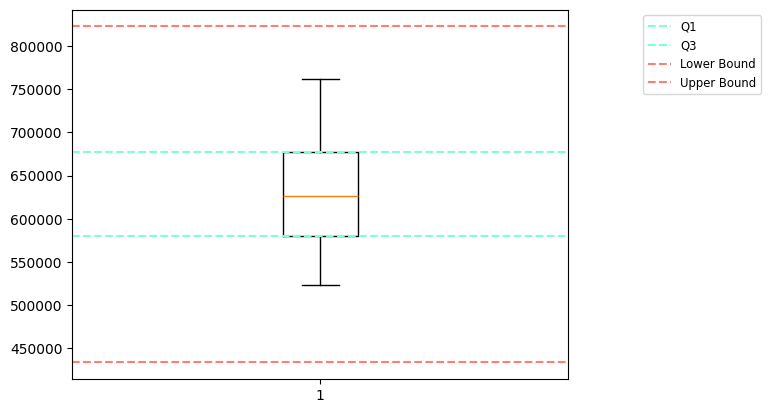

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


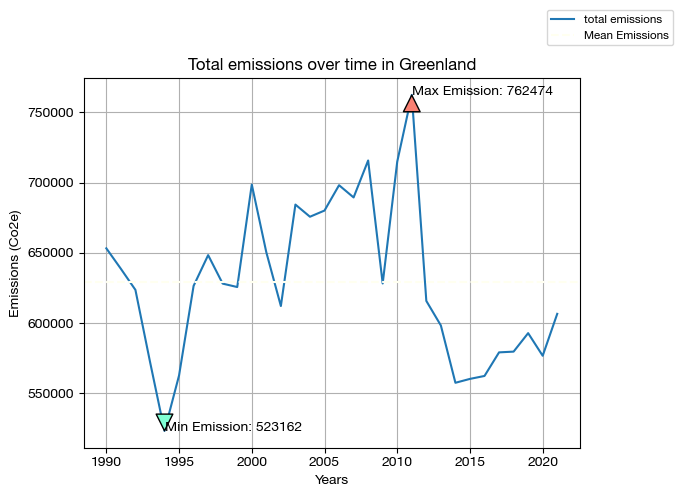

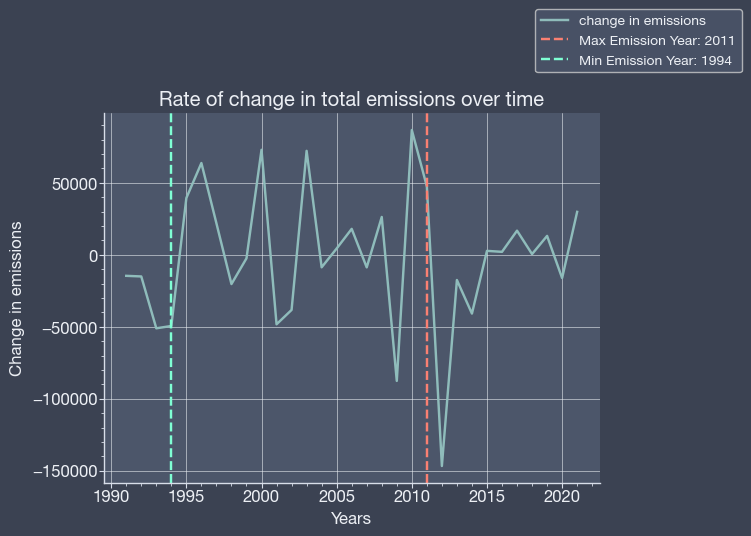

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 6.229180266273012


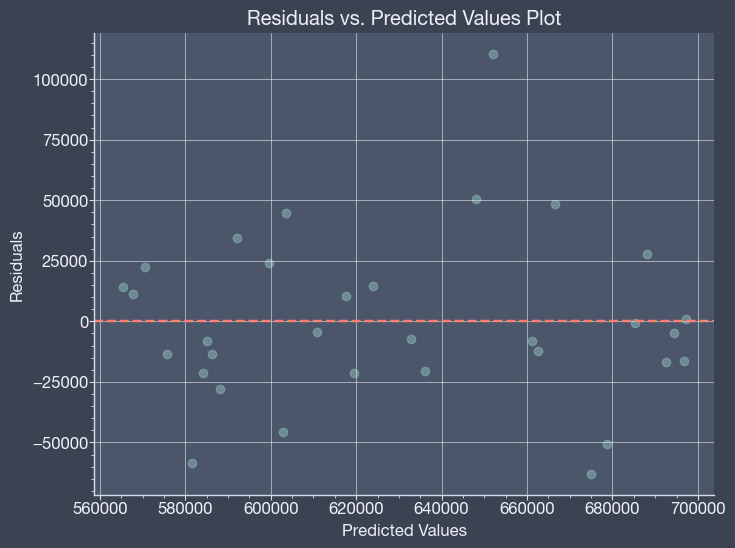

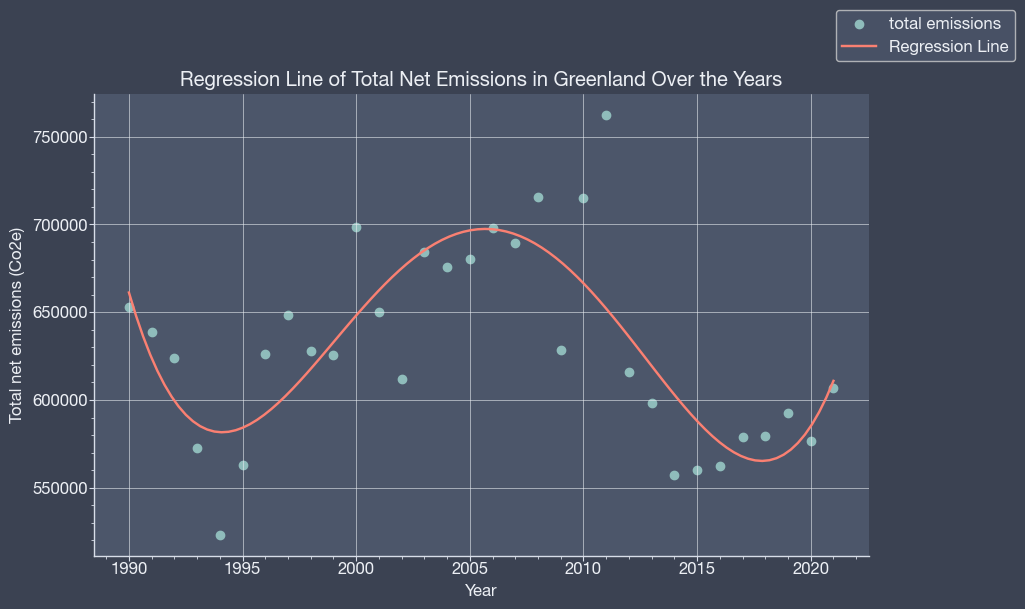

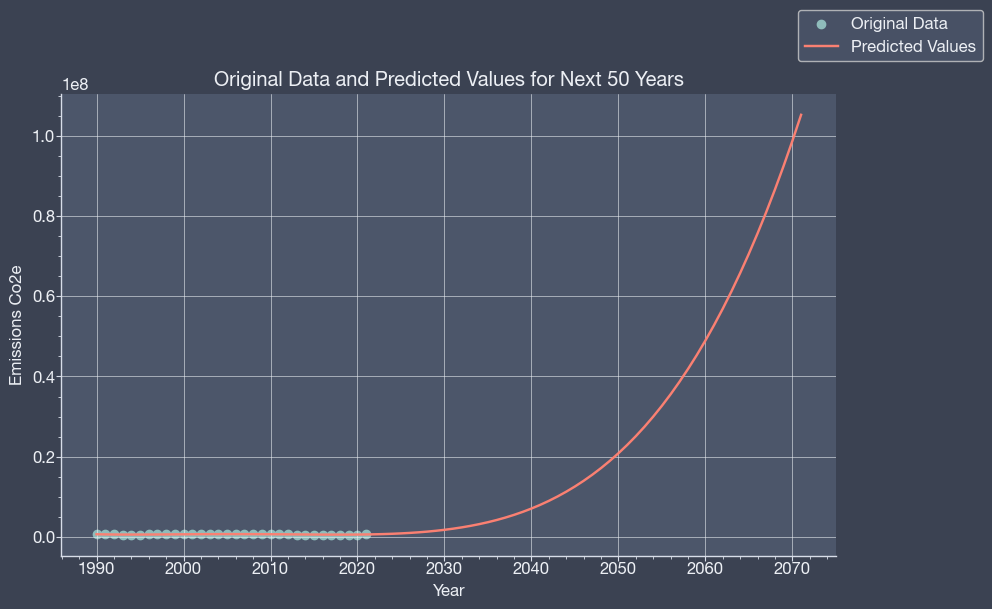

In [2]:
%run greenland_greenhouse_emissions_total.ipynb

In [3]:
agriculture_df = df[df['sector'].isin(['Total (net emissions)', '3. Agriculture', '  3.A Livestocks fermentation', '  3.B Manure Management', '  3.C Agricultural Soils'])]
agriculture_df = agriculture_df.drop(columns=['greenhousegas'])
agriculture_df.head()

,sector,time,Greenlands total emission of greenhousegasses
0,Total (net emissions),1990,653216
1,Total (net emissions),1991,638634
2,Total (net emissions),1992,623622
3,Total (net emissions),1993,572582
4,Total (net emissions),1994,523162


In [4]:
#get the mean value for fuel emissions over the period between 1990-2020
mean_agriculture_emissions = agriculture_df[agriculture_df['sector'] == '3. Agriculture']['Greenlands total emission of greenhousegasses'].mean()
std_dev_agriculture_emissions = agriculture_df[agriculture_df['sector'] == '3. Agriculture']['Greenlands total emission of greenhousegasses'].std()

print(f'The average agriculture emissions level over the specified period is {mean_agriculture_emissions} units.\
There is a relatively low amount of variability in the emissions data, with emissions values typically deviating \
from the average by approximately {std_dev_agriculture_emissions} units.')

#select only total fuel emissions, not divided by sub-sector
total_agriculture_emissions = agriculture_df[agriculture_df['sector'] == '3. Agriculture']

#Find the index of the maximum value
max_index = total_agriculture_emissions['Greenlands total emission of greenhousegasses'].idxmax()

# Get the corresponding year value using the index
max_year = agriculture_df.loc[max_index, 'time']
# Get the maximum value
max_value = total_agriculture_emissions['Greenlands total emission of greenhousegasses'].max()

print(f'The maximum value of agriculture emissions is {max_value} carbon dioxide equivalents (CO2e),corresponding to the year of {max_year}')

#Find the index of the minimum value
min_index = total_agriculture_emissions['Greenlands total emission of greenhousegasses'].idxmin()

# Get the corresponding year value using the index
min_year = agriculture_df.loc[min_index, 'time']

# Get the minimum value
min_value = total_agriculture_emissions['Greenlands total emission of greenhousegasses'].min()

print(f'The minimum value is {min_value} carbon dioxide equivalents (CO2e), corresponding to the year of {min_year}')

The average agriculture emissions level over the specified period is 9249.28125 units.There is a relatively low amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 662.8370711290243 units.
The maximum value of agriculture emissions is 10503 carbon dioxide equivalents (CO2e),corresponding to the year of 2008
The minimum value is 7634 carbon dioxide equivalents (CO2e), corresponding to the year of 1993


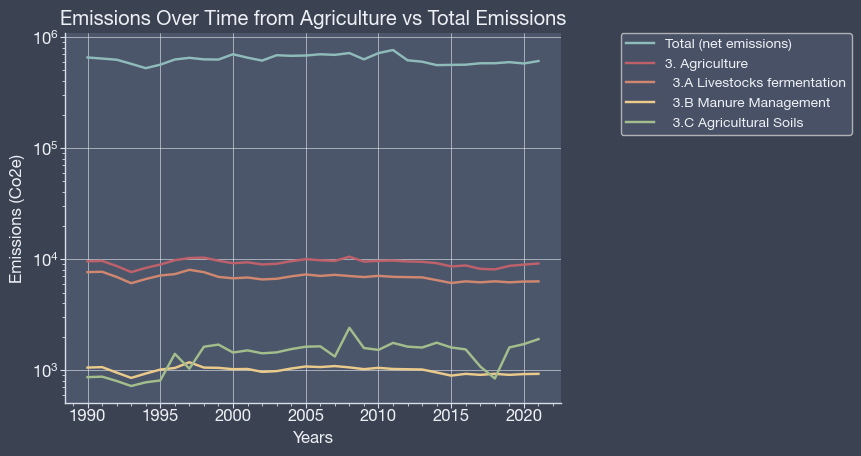

In [5]:
# Iterate over unique values in the 'sector' column
for sector in agriculture_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = agriculture_df[agriculture_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

# Set y-axis scale to logarithmic
plt.yscale('log')

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Agriculture vs Total Emissions')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from agriculture versus total net emissions.jpg', bbox_inches='tight')

plt.show()

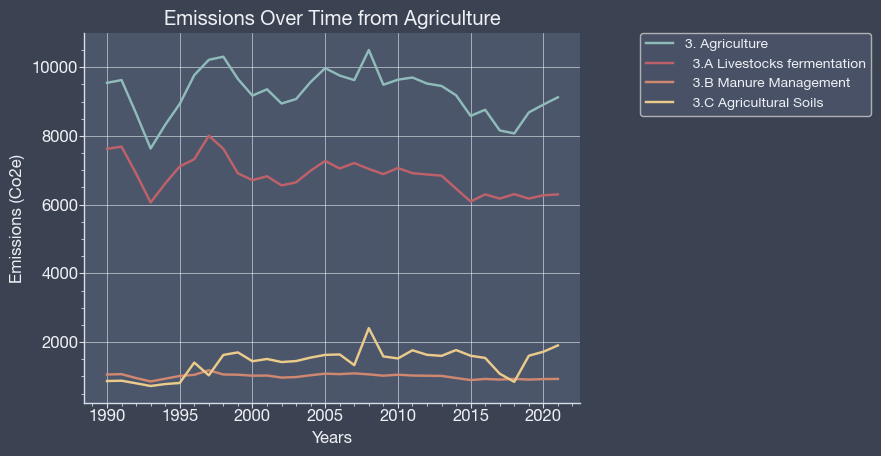

In [6]:
agriculture2_df = df[df['sector'].isin(['3. Agriculture', '  3.A Livestocks fermentation', '  3.B Manure Management', '  3.C Agricultural Soils'])]

# Iterate over unique values in the 'sector' column
for sector in agriculture2_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = agriculture2_df[agriculture2_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Agriculture')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from different agricultural sources.jpg', bbox_inches='tight')

plt.show()

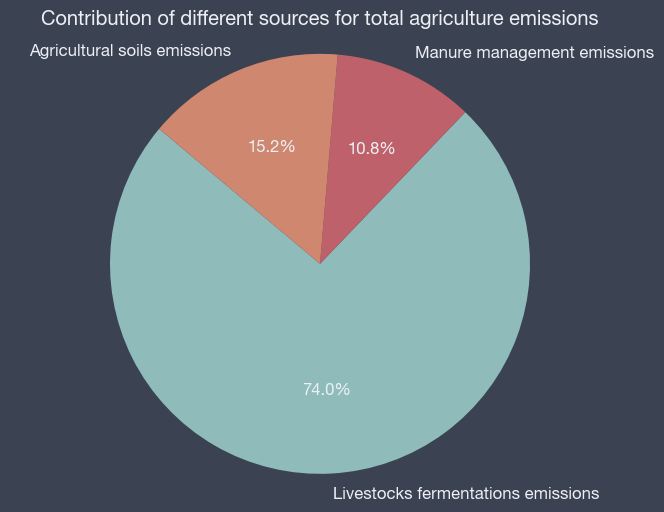

In [7]:
total_emissions = agriculture_df[agriculture_df['sector'] == '3. Agriculture']['Greenlands total emission of greenhousegasses'].sum()
live_ferm_emissions = agriculture_df[agriculture_df['sector'] == '  3.A Livestocks fermentation']['Greenlands total emission of greenhousegasses'].sum()
manure_emissions = agriculture_df[agriculture_df['sector'] == '  3.B Manure Management']['Greenlands total emission of greenhousegasses'].sum()
soils_emissions = agriculture_df[agriculture_df['sector'] == '  3.C Agricultural Soils']['Greenlands total emission of greenhousegasses'].sum()


# Calculate the percentage of emissions from livestocks fermentation
percentage_live_ferm_emissions = (live_ferm_emissions / total_emissions) * 100

# Calculate the percentage of emissions from manure management
percentage_manure_emissions = (manure_emissions / total_emissions) * 100

# Calculate the percentage of emissions from agricultural soils
percentage_soils_emissions = (soils_emissions / total_emissions) * 100


# Create labels for the pie chart
labels = ['Livestocks fermentations emissions', 'Manure management emissions', 'Agricultural soils emissions']

# Create sizes for the pie chart
sizes = [percentage_live_ferm_emissions, percentage_manure_emissions, percentage_soils_emissions]

# Create the pie chart
plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of different sources for total agriculture emissions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Contribution of different sources for total agriculture emissions.jpg', bbox_inches='tight')

plt.show()